# 1. Install Dependencies and Setup

In [1]:
# !pip install tensorflow opencv-python 
# tensorflow-gpu matplotlib

import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

In [2]:
# change the shuffle parameter ok
# check de shape of the datsets
# set random seed at some point ok
# some of the scores are negative, maybe use sigmoid function

In [3]:

import cv2
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# !python -m pip freeze

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Load Data

### 2.1 Load Images

In [6]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [7]:
train_images = tf.data.Dataset.list_files('data\\train_2_aug\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (250,250)))
train_images = train_images.map(lambda x: x/255)

In [8]:
test_images = tf.data.Dataset.list_files('data\\test_2_aug\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (250,250)))
test_images = test_images.map(lambda x: x/255)

In [9]:
val_images = tf.data.Dataset.list_files('data\\val_2_aug\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (250,250)))
val_images = val_images.map(lambda x: x/255)

### 2.2 Prepare Labels

In [10]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
    return [label['keypoints']]

In [11]:
train_labels = tf.data.Dataset.list_files('data\\train_2_aug\\labels\\*.json', shuffle = False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

In [12]:
train_labels.as_numpy_iterator().next()
# x left eye, y left eye, x right eye, y right eye

(array([0.3738, 0.1531, 0.    , 0.    ], dtype=float16),)

In [13]:
test_labels = tf.data.Dataset.list_files('data\\test_2_aug\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

In [14]:
val_labels = tf.data.Dataset.list_files('data\\val_2_aug\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

### 2.3. Combine Labels and Images

In [15]:
# tf.random.set_seed(42)

In [16]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(2000)
train = train.batch(16)
train = train.prefetch(4)


In [17]:
# train
train.as_numpy_iterator().next()[0].shape

(16, 250, 250, 3)

In [18]:
train.as_numpy_iterator().next()

(array([[[[0.35395294, 0.29512942, 0.18140392],
          [0.3586008 , 0.29977724, 0.18605176],
          [0.38712943, 0.3283059 , 0.20673725],
          ...,
          [0.38259602, 0.33161563, 0.20612542],
          [0.37237483, 0.32139444, 0.19590423],
          [0.43816215, 0.38718176, 0.26169154]],
 
         [[0.4053145 , 0.34649098, 0.2327655 ],
          [0.40392157, 0.34509805, 0.23137255],
          [0.3786667 , 0.31984314, 0.1982745 ],
          ...,
          [0.35046303, 0.29948264, 0.17399243],
          [0.39486206, 0.34388167, 0.2183915 ],
          [0.51615655, 0.46517614, 0.33968592]],
 
         [[0.41553724, 0.3567137 , 0.24298824],
          [0.43327844, 0.37445492, 0.2607294 ],
          [0.42039216, 0.36156863, 0.24000001],
          ...,
          [0.34752938, 0.296549  , 0.16321567],
          [0.40731052, 0.35633013, 0.22299677],
          [0.4535528 , 0.40257242, 0.2692391 ]],
 
         ...,
 
         [[0.9641412 , 0.90531766, 0.78374904],
          [0.90282

In [19]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1000)
test = test.batch(16)
test = test.prefetch(4)

In [20]:
test.as_numpy_iterator().next()[0].shape

(16, 250, 250, 3)

In [21]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(900)
val = val.batch(16)
val = val.prefetch(4)

In [22]:
val.as_numpy_iterator().next()[0].shape

(16, 250, 250, 3)

### 2.4 View Samples

In [23]:
data_samples = train.as_numpy_iterator()

In [24]:
res = data_samples.next()

In [25]:
res

(array([[[[3.82603928e-02, 3.04172561e-02, 7.35545084e-02],
          [4.08988260e-02, 3.30556855e-02, 7.61929378e-02],
          [3.90509814e-02, 3.12078446e-02, 7.43450969e-02],
          ...,
          [6.07670605e-01, 5.21003962e-01, 3.77866805e-01],
          [6.16313815e-01, 5.25098205e-01, 3.67372453e-01],
          [6.27778828e-01, 5.29739618e-01, 3.68955344e-01]],
 
         [[3.75325494e-02, 2.96894107e-02, 7.28266686e-02],
          [3.92156877e-02, 3.13725509e-02, 7.45098069e-02],
          [3.63137275e-02, 2.84705888e-02, 7.16078430e-02],
          ...,
          [6.10949039e-01, 5.24282336e-01, 3.80941272e-01],
          [6.18588328e-01, 5.27372718e-01, 3.69646966e-01],
          [6.24820352e-01, 5.26781142e-01, 3.65996838e-01]],
 
         [[4.08627465e-02, 3.69411781e-02, 6.83137253e-02],
          [4.21176478e-02, 3.81960757e-02, 6.95686266e-02],
          [3.92549038e-02, 3.53333354e-02, 6.67058825e-02],
          ...,
          [6.20313704e-01, 5.26196063e-01, 3.8501

In [26]:
res[0].shape

(16, 250, 250, 3)

In [27]:
np.multiply(res[1][0][2], [250, 250, 250, 250])

array([0., 0., 0., 0.])

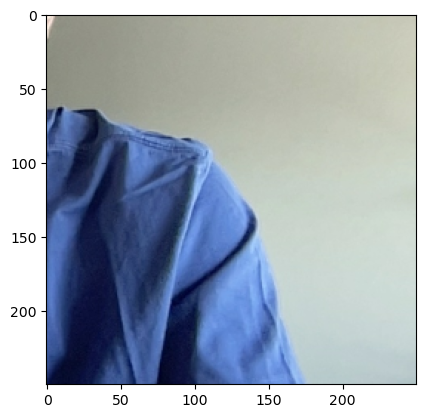

In [28]:
plt.imshow(res[0][2]);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


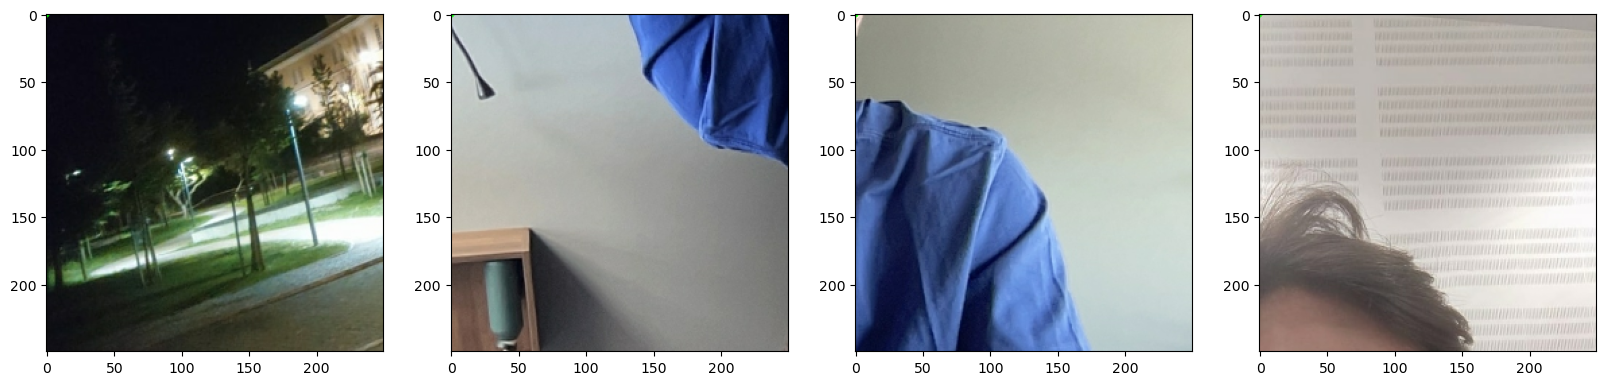

In [29]:
# sample_image_writable = res.copy()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx].copy()
    sample_coords = res[1][0][idx]
    
    cv2.circle(sample_image, tuple(np.multiply(sample_coords[:2], [250,250]).astype(int)), 2, (255,0,0), -1)
    cv2.circle(sample_image, tuple(np.multiply(sample_coords[2:], [250,250]).astype(int)), 2, (0,255,0), -1)
    
    ax[idx].imshow(sample_image)

# 3. Build Model

### 3.1 Create Neural Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Reshape, Dropout
from tensorflow.keras.applications import ResNet152V2

In [31]:
# we know that the input layer has the shape 250, 250, 3. so we need to add it in the beggining of the sequential
input_layer = Input(shape=(250,250,3))
input_layer

<KerasTensor: shape=(None, 250, 250, 3) dtype=float32 (created by layer 'input_1')>

In [32]:
# include a pretrained image classifiers. it has the ability to drop the top for the image classifier, and we dont need that
backbone = ResNet152V2(include_top=False)(input_layer)

# now we have a (None, 8, 8, 2048) batch size, height, weight, deep. we came from a big image to a small one but much deeper one
backbone

# but we still need to reduce it to a set of 4 values by adding hidden layers

<KerasTensor: shape=(None, 8, 8, 2048) dtype=float32 (created by layer 'resnet152v2')>

In [33]:
#adding the first convolutional layer and connect them
cnn1 = Conv2D(512, 3, padding='same', activation='relu')(backbone)
cnn2 = Conv2D(512, 3, padding='same', activation='relu')(cnn1)
cnn3 = Conv2D(256, 3, 2, padding='same', activation='relu')(cnn2) 
cnn4 = Conv2D(256, 2, 2, activation='relu')(cnn3) 

#256 is how many filter we have in out CNN, 
#3 is how big are the filter in number of pixels, 
#and 2 is the strides component or how fast it is moving across the image and condensing the amount of data we are getting back
#padding pads the outside of the image so we can filter across the entire set. 
#the default value is valid, which means that it's only going to convolve across the sections of the image that have a validator effectively. 
#if gets to the edge either pad out or not convolve

# reducing the spacial component and increasing the strike of our convolutional neural network
cnn4

<KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'conv2d_3')>

In [34]:
cnn5 = Conv2D(4, 2, 2)(cnn4)

#now we have (1, 1, 4) and we just need to reshape it
cnn5

<KerasTensor: shape=(None, 1, 1, 4) dtype=float32 (created by layer 'conv2d_4')>

In [35]:
reshape = Reshape((4,))(cnn5)
reshape

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'reshape')>

In [36]:
model = Sequential([
    Input(shape=(250,250,3)), 
    ResNet152V2(include_top=False, input_shape=(250,250,3)),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(256, 3, 2, padding='same', activation='relu'),
    Conv2D(256, 2, 2, activation='relu'),
    Dropout(0.05), # the dropout layer we add to prevent from overfit. you can change how many parameters you dropout
    Conv2D(4, 2, 2),
    Reshape((4,))
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 512)         9437696   
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 512)         2359808   
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 256)         1179904   
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 256)         262400    
                                                                 
 dropout (Dropout)           (None, 2, 2, 256)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 1, 4)           4

In [38]:
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D

# input_tensor = Input(shape=(250, 250, 3))
# resnet_layer = ResNet152V2(include_top=False, input_tensor=input_tensor)
# model = Model(inputs=input_tensor, outputs=resnet_layer.output)

# # Output the shape after ResNet152V2
# print(model.output_shape)

In [39]:
# Assuming the output shape of ResNet is suitable for a max pooling layer
# max_pool = MaxPooling2D(pool_size=(2, 2))(resnet_layer.output)

# Adding layers after MaxPooling2D
# x = Conv2D(512, 3, padding='same', activation='relu')(max_pool)
# x = Conv2D(512, 3, padding='same', activation='relu')(x)
# x = Conv2D(256, 3, strides=2, padding='same', activation='relu')(x)
# x = Conv2D(256, 2, strides=2, activation='relu')(x)
# x = Dropout(0.05)(x)
# x = Conv2D(4, 2, strides=2)(x)
# output_tensor = Reshape((4,))(x)

# # Final model
# final_model = Model(inputs=input_tensor, outputs=output_tensor)
# final_model.summary()

In [40]:
# model.summary()

### 3.2 Setup Losses and Optimizer

In [41]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=0.0007)
loss = tf.keras.losses.MeanSquaredError()

In [42]:
model.compile(optimizer, loss)

### 3.3 Sense Check predictions

In [43]:
X, y = train.as_numpy_iterator().next()

In [44]:
X.shape

(16, 250, 250, 3)

In [45]:
scores = model.predict(X)

1/1 [==============================] - 26s 26s/step


In [46]:
scores

array([[-0.03102699,  0.5095106 , -0.03782418, -0.5387101 ],
       [-0.5515516 ,  0.07477758,  0.52560717, -0.5193077 ],
       [-0.44764674,  0.12408228,  0.3962971 , -0.49820045],
       [-0.50334215,  0.09361053,  0.47428185, -0.5361579 ],
       [-0.6504119 , -0.57555276,  0.10532448, -0.43225   ],
       [-0.10737021,  0.02265032,  0.684937  , -0.12945776],
       [-0.3193062 , -0.23443723, -0.38981667, -0.35747352],
       [-0.6421246 , -0.88456446,  0.32907873, -0.5158654 ],
       [-0.4324795 ,  0.06841424,  0.18400791, -0.32648414],
       [-0.53302217, -0.16714568,  0.47531027, -0.51768637],
       [-0.73101884, -0.5217756 ,  0.4513251 , -0.7559538 ],
       [-0.7096877 , -0.08236426,  0.37207243, -0.9563331 ],
       [-0.29259706, -0.17702791, -0.06608083, -0.44815937],
       [-0.13731435, -0.40847635,  0.13507332, -1.1136323 ],
       [-0.63591844, -0.83506143, -0.37676412, -0.01711818],
       [-1.4790819 , -0.19070458,  0.1939487 ,  0.51018107]],
      dtype=float32)

### 3.4 Train the Model

In [47]:
callback = EarlyStopping(monitor='loss', patience=3)

In [ ]:
# Train for 100 epochs
hist = model.fit(train, epochs=5, validation_data=val,verbose=1, callbacks=[callback])

Epoch 1/5

207/207 [==============================] - 1855s 9s/step - loss: 0.4918 - val_loss: 0.0332
Epoch 2/5
207/207 [==============================] - 1900s 9s/step - loss: 0.0365 - val_loss: 0.0324
Epoch 3/5
  6/207 [..............................] - ETA: 37:48 - loss: 0.0338

# 4. Review Performance

### 4.1 View Loss Plots

In [ ]:
hist.history

In [ ]:
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val loss')
plt.suptitle('Loss')
plt.legend()
plt.show()

### 4.2. Make Predictions on Test

In [ ]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = model_vgg.predict(test_sample[0])
plot_sample_images(0, 4, test_sample[0], yhat)

In [ ]:
# test_data = test.as_numpy_iterator()

In [ ]:
# test_sample = test_data;.next()

In [ ]:
# yhat = model.predict(test_sample[0])

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx in range(4): 
#     sample_image = test_sample[0][idx]
#     sample_coords = yhat[idx]
    
#     cv2.circle(sample_image, tuple(np.multiply(sample_coords[:2], [250,250]).astype(int)), 2, (255,0,0), -1)
#     cv2.circle(sample_image, tuple(np.multiply(sample_coords[2:], [250,250]).astype(int)), 2, (0,255,0), -1)
    
#     ax[idx].imshow(sample_image)

### 4.3. Save the Model